## Nkhamar@scu.edu (NIYATI KHAMAR)
## Asheth@scu.edu (AARJAV SHETH)
## Ayadav@scu.edu (ANISH YADAV)

# <center>FINAL PROJECT<center>
    
   <img src="files/politics-money.jpg">




As international students coming from India,We were very fascinated by how elections work in the United States.As our prime Minister put it - The oldest democracy vs. The largest democracy.After witnessing a part of the 2020 Presidential Elections in the United States it was shocking to see how much candidates spend on advertising and other election spending. We decided to pick up this dataset we found describing the American Congressional Election Disbursments.

There are many Analyses with the candidates' profiles, political experiences, campaign slogans, signature issues and strategies, advantages and disadvantages, etc. However, the financial resource they possess is less discussed in the mass media. The economic behaviors of political figures and groups, who have an absolute influence on the economy, are seldom evaluated from a financial angle.This fact remains the same throuout the world.

With this analysis we aim to figure out:

**Where are candidates spending all their money?**

**How much does spending money affect whether they win or not?** 


# Data Source:

## LINKS TO DATA:
https://www.kaggle.com/fec/congressional-election-expenditures
https://drive.google.com/file/d/1OmHrhpOoSU481aM2Q2RMHTnwSu01owMX/view?usp=sharing  (2018 data)
https://data.world/govtrack/us-congress-legislators

Campaign committees are required to disclose all specific disbursements that are contributions to other federal candidates or parties or other committees as well as all loan repayments. For other spending (normal operating expenses, for example or contributions to state or local candidates) specific disbursements must be disclosed when the amount paid to any one vendor exceeds $200 in an election cycle. This information was stated after reviewing the FEC's Campaign Guide (https://classic.fec.gov/pdf/candgui.pdf).

The disbursement datasets are provided by the **Federal Election Commission** online.


## Data Description:

#### A description of the coloumns in our dataset.For this particular project we will be using 4 datasets of seperate cycles and joining them for our findings

**com_id**-Committee ID - Unique identifier used by the Commission to identify each political committee.

**com_name** -Committee Name - Name of committee 

**can_id** -Candidate ID- ID of candidate in the political committee.(H=House, S=Senate, P=Presidential)

**can_nam** -Candidate name-Name of the candidate

**ele_yea** -Election year-General election year in which this candidate is running

**can_off** -Candidate Office-Office (P=President; S=Senate; H=House)

**can_off_sta** -Candidate Office State	-	Postal abbreviation for State		

**can_off_dis** -Candidate Office District	-District number for House candidates

**lin_num-Line number from Detailed Summary Page of FEC Form 3** -category of disbursement based on detailed summary page of FEC Form 3	

**rec_com_id** -Recipient Committee ID	- ID number of the committee receiving the payment

**rec_nam** -Recipient Name -	Name of the person or vendor or other entity receiving this payment from the committee

**rec_str1** -Recipient Street Address-	Street address of entity being paid	max 

**rec_str2** -Apt. number or Suite number- For the recipient		

**rec_cit** -recipient city	- For the recipient

**rec_sta** -recipient state	- postal state abbreviation

**rec_zip** -recipient zip - zip code for the recipient

**dis_dat** -date of disbursement - date of specific disbursement		

**dis_amo** -amount of disbursement	- amount spent	

**dis_pur_des** -purpose description	- description of the purpose of the disbursement.

**mem_cod** -memo code	-	record is "memo" so not included in totals

**mem_tex** -memo text	- explanation for the memo notation

**cat_cod** -category code	- see the list of category codes

**cat_des**-category description	-	description of category for disbursement

**tra_id**-transaction id	-	unique identifier for the transaction 

**bac_ref_id** -back reference id-	"parent" transaction id where there is a relationship between two transactions 

In [1]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly

# Data Exploration

In [2]:
## Load the data
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

df2012=pd.read_csv('all_house_senate_2012.csv',low_memory=False)
df2014=pd.read_csv('all_house_senate_2014.csv',low_memory=False)
df2016=pd.read_csv('all_house_senate_2016.csv',encoding='ANSI',low_memory=False)
df2018=pd.read_csv('all_house_senate_2018.csv',low_memory=False)

data = pd.concat([df2012,df2014,df2016,df2018])


In [3]:
import warnings
warnings.filterwarnings('ignore')
df2012.head()

,com_id,com_nam,can_id,can_nam,ele_yea,can_off,can_off_sta,can_off_dis,lin_num,lin_ima,...,rec_zip,dis_dat,dis_amo,dis_pur_des,mem_cod,mem_tex,cat_cod,cat_des,tra_id,bac_ref_id
0,C00012229,ALASKANS FOR DON YOUNG,H6AK00045,"YOUNG, DONALD E",2012,H,AK,1.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?129713...,...,99503,2012-04-12,$100.00,OFFICE SNOW PLOWING,NaN,OFFICE SNOW PLOWING,NaN,NaN,20620.E11576,NaN
1,C00116632,HAL ROGERS FOR CONGRESS,H0KY05015,"ROGERS, HAROLD DALLAS",2012,H,KY,5.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?129503...,...,40511,2011-12-21,"$4,491.01",CATERING/LODGING,NaN,NaN,NaN,NaN,D184-00BL0D,NaN
2,C00116632,HAL ROGERS FOR CONGRESS,H0KY05015,"ROGERS, HAROLD DALLAS",2012,H,KY,5.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?129503...,...,20001,2011-10-12,"$1,400.40","* IN-KIND->CATERING, RM RENTAL, STAF",NaN,NaN,NaN,NaN,D339-01MU01,NaN
3,C00412312,KANSAFORNIAN PAC,H6CA48039,"CAMPBELL, JOHN BT III",2012,H,CA,45.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?139609...,...,927055646,2012-09-26,"$5,000.00",SLATE APPERANCE FOR PROPOSITIO,NaN,NaN,NaN,NaN,B-E-14419,NaN
4,C00410118,BACHMANN FOR CONGRESS,P20002978,"BACHMANN, MICHELE",2012,P,US,0.0,17,http://docquery.fec.gov/cgi-bin/fecimg/?129514...,...,940431307,2012-03-02,$59.95,FUNDRAISING: CREDIT CARD FEES,NaN,NaN,003,Solicitation and Fundraising Expenses,B-E-504262,NaN


In [4]:
## finding number of rows in our dataset
len(df2012)+len(df2014)+len(df2016)+len(df2018) # There are about 3.5 million rows in all.

3522425

In [5]:
## names of coloumns in the dataset(datasets are identical)

df2012.columns


Index(['com_id', 'com_nam', 'can_id', 'can_nam', 'ele_yea', 'can_off',
       'can_off_sta', 'can_off_dis', 'lin_num', 'lin_ima', 'rec_com_id',
       'rec_nam', 'rec_str1', 'rec_str2', 'rec_cit', 'rec_sta', 'rec_zip',
       'dis_dat', 'dis_amo', 'dis_pur_des', 'mem_cod', 'mem_tex', 'cat_cod',
       'cat_des', 'tra_id', 'bac_ref_id'],
      dtype='object')

In [6]:
## there are 26 rows in all datasets(datasets are identical)
a=df2012.columns
len(a)

26

# Data Cleaning and Feature Engineering

In [7]:
## removing $ signs from the dis_amo 

data.dis_amo.replace({'\$':''},regex=True,inplace=True)
data.dis_amo.replace({'\,':''},regex=True,inplace=True)
data.dis_amo.replace({'\(':'-'},regex=True,inplace=True)
data.dis_amo.replace({'\)':''},regex=True,inplace=True)
data['dis_amo'] = pd.to_numeric(data.dis_amo)
data.dis_amo.sum() 


8402863354.370003

In [8]:
#Split to positive and negetive coloumns
mask = data['dis_amo'] < 0
data['dis_amo_pos'] = data['dis_amo'].mask(mask)
data['dis_amo_neg'] = data['dis_amo'].mask(~mask)
data['dis_amo_pos'].fillna(0, inplace=True)
data['dis_amo_neg'].fillna(0, inplace=True)

In [9]:
## checking for null values

data.isna().sum()

com_id               0
com_nam              0
can_id               0
can_nam              0
ele_yea              0
can_off              0
can_off_sta          0
can_off_dis        639
lin_num              3
lin_ima              0
rec_com_id     3466259
rec_nam           1258
rec_str1         19241
rec_str2       2953957
rec_cit          12894
rec_sta          14312
rec_zip          20760
dis_dat            362
dis_amo             70
dis_pur_des      19394
mem_cod        2680548
mem_tex        2925816
cat_cod        2234668
cat_des        2237429
tra_id               4
bac_ref_id     3036665
dis_amo_pos          0
dis_amo_neg          0
dtype: int64

In [10]:
## replacing null values
data.dropna(subset=['dis_dat'], how='all', inplace = True)

In [11]:
## filling missing values with mean
data['dis_amo'].fillna(data['dis_amo'].mean(), inplace=True)

In [12]:
## dropping unwanted coloumns

data.drop('rec_com_id',axis=1,inplace=True)
data.drop('rec_str1',axis=1,inplace=True)
data.drop('rec_str2',axis=1,inplace=True)
data.drop('mem_cod',axis=1,inplace=True)
data.drop('mem_tex',axis=1,inplace=True)
data.drop('com_id',axis=1,inplace=True)
data.drop('lin_ima',axis=1,inplace=True)
data.drop('lin_num',axis=1,inplace=True)
data.drop('bac_ref_id',axis=1,inplace=True)
data.drop('tra_id',axis=1,inplace=True)
data.drop('cat_cod',axis=1,inplace=True)

In [13]:
#Impute missing categorical values :

data['can_off_dis'].fillna('UNKNOWN', inplace=True)
data['rec_sta'].fillna('UNKNOWN', inplace=True)
data['rec_cit'].fillna('UNKNOWN', inplace=True)
data['rec_zip'].fillna('UNKNOWN', inplace=True)
data['dis_pur_des'].fillna('UNKNOWN', inplace=True)
data['cat_des'].fillna('OTHERS', inplace=True)
data['rec_nam'].fillna('UNKNOWN', inplace=True)

In [14]:
## no null values now

data.isna().any()

com_nam        False
can_id         False
can_nam        False
ele_yea        False
can_off        False
can_off_sta    False
can_off_dis    False
rec_nam        False
rec_cit        False
rec_sta        False
rec_zip        False
dis_dat        False
dis_amo        False
dis_pur_des    False
cat_des        False
dis_amo_pos    False
dis_amo_neg    False
dtype: bool

In [15]:
##importing a dataset of current legislatures to see if they won the election

df_legislator_current=pd.read_csv('legislators-current.csv')
df_legislator_current.head()


,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,...,N00003535,S307,"H2OH13033,S6OH00163",5051.0,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,N00007836,S275,"S8WA00194,H2WA01054",26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell
2,Cardin,Benjamin,L.,NaN,NaN,Benjamin L. Cardin,1943-10-05,M,sen,MD,...,N00001955,S308,"H6MD03177,S6MD03177",4004.0,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin
3,Carper,Thomas,Richard,NaN,NaN,Thomas R. Carper,1947-01-23,M,sen,DE,...,N00012508,S277,S8DE00079,663.0,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper
4,Casey,Robert,P.,Jr.,Bob,"Robert P. Casey, Jr.",1960-04-13,M,sen,PA,...,N00027503,S309,S6PA00217,47036.0,412246,2541.0,"Bob Casey, Jr.",NaN,40703.0,Bob Casey Jr.


In [16]:
## making a new column in existing dataset towards the candidate ID

current_legislator_fec_ids = list(df_legislator_current.fec_ids)
data['win'] = data.apply(lambda x: (1 if x.can_id in current_legislator_fec_ids else 0),axis=1)

In [17]:
data.columns

Index(['com_nam', 'can_id', 'can_nam', 'ele_yea', 'can_off', 'can_off_sta',
       'can_off_dis', 'rec_nam', 'rec_cit', 'rec_sta', 'rec_zip', 'dis_dat',
       'dis_amo', 'dis_pur_des', 'cat_des', 'dis_amo_pos', 'dis_amo_neg',
       'win'],
      dtype='object')

# Preliminary Analysis

Now we move on to the analysis part of the project , We first perform some data exploration to find any outlying trends in the data

## Finding a general trend of spending over the years

From this trend we see that the spending has increased significantly from 2014 to 2018 .


Our Guess: We might be wrong but we attributed this to President Trump assuming Office in 2016. Talking about politics being a money game-President Trump is one of the wealthiest people to assume the office of president.He was a businessman prior to getting into politics and we read multiple articles outlining his spending in advertising during his election campaign.
It is our assumption that this trend continued while in office.
This trend is also upward due to economic factors such as inflation.

In [18]:
## importing dependencies

import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

(0, 4000000000)

Text(0, 0.5, 'Total amount spent in $')

Text(0.5, 0, 'Election year')

Text(0.5, 1.0, 'YoY trend for the Disbursement amount')

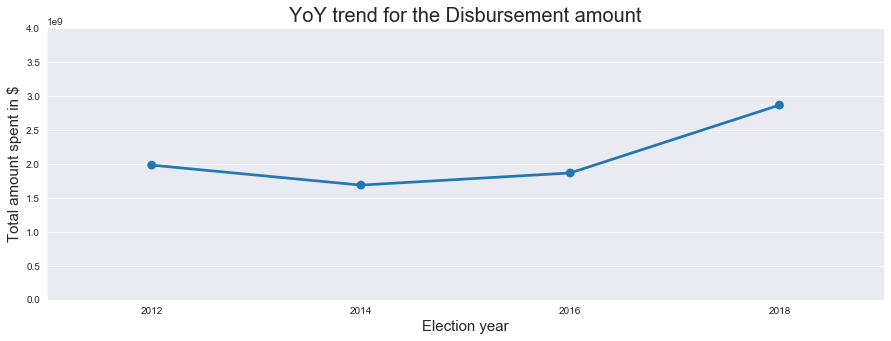

In [19]:
## Here is a preliminary analysis of where the spending trend is heading
## Grouping the elction year column and sum the disbursement amount

a = pd.DataFrame(data.groupby(['ele_yea'],as_index=False).dis_amo.sum())

# Figure settings
mpl.rc("figure", figsize=(15, 5))
sns.set_style("darkgrid")

# Graph plot and graph settings
graph1 = sns.pointplot(x="ele_yea", y="dis_amo", data=a)
graph1.set_ylim(0,4000000000)
graph1.set_ylabel('Total amount spent in $',size=15)
graph1.set_xlabel('Election year',size=15)
graph1.set_title('YoY trend for the Disbursement amount',size=20)


## Plotting the month wise disbursement amount for each year

We wanted to see what month has the maximum expenditure. 
There is a clear seasonal trend seen in the data over years. The disbursement amount is at the peak in the month of october every two years.

Explaination:Since the elections are held in the month of november, the expenditure could be maximum in the previous month. 


In [20]:
## extracting month from year data

data['year_rec'] = pd.to_numeric(data.dis_dat.str[0:4])
data1 = data[(data['year_rec'] >= 2012) & (data['year_rec'] <= 2018)]
data1['month_rec'] = pd.DatetimeIndex(data1['dis_dat']).month

Text(0, 0.5, 'Total amount spent in $')

Text(0.5, 0, 'Jan 2012 - Dec 2018')

Text(0.5, 1.0, 'Total amount spent every month ')

<Figure size 1080x360 with 0 Axes>

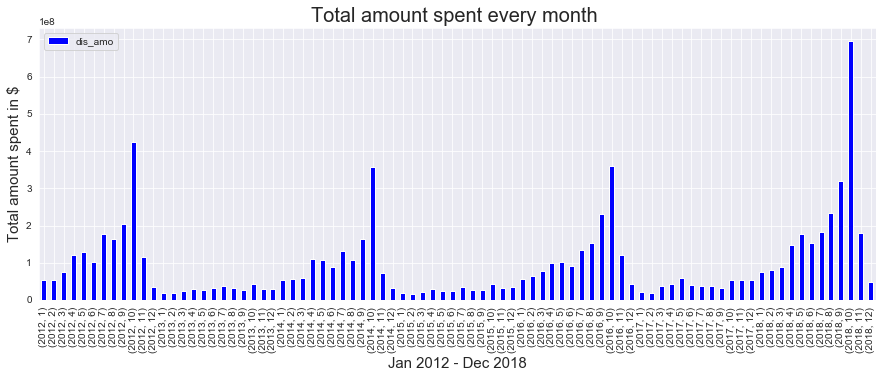

In [21]:

# grouping the amount spent by the year and month of recieved date
g = pd.DataFrame(data1.groupby(['year_rec','month_rec']).dis_amo.sum())

# Graph and graph settings
fig = plt.figure()
graph2 = g.plot(kind='bar',figsize=(15,5),color='b')

graph2.set_ylabel('Total amount spent in $',size=15)
graph2.set_xlabel('Jan 2012 - Dec 2018',size=15)
graph2.set_title('Total amount spent every month ',size=20)

# Finding 1:

## Finding what category was spent after the most

From this we find that the maximum amount of expenditure is undocumented.Which is what we suspected as this is the case in our country as well.Politicians often make anonymous donations or monetary compensation support to corporations in exchange for their support during the election.
The highest expenditure is spent for Administrative and Salary expenses which holds 42% of the expenses. 
The second and third major expenses are Advertising expenses(29%) and Solicitation & Fund raising expenses(10%)

Text(0, 0.5, 'Disbursement Category')

Text(0.5, 0, 'Total amount spent in $')

Text(0.5, 1.0, 'Total expenses spent for each Disbursement Category')

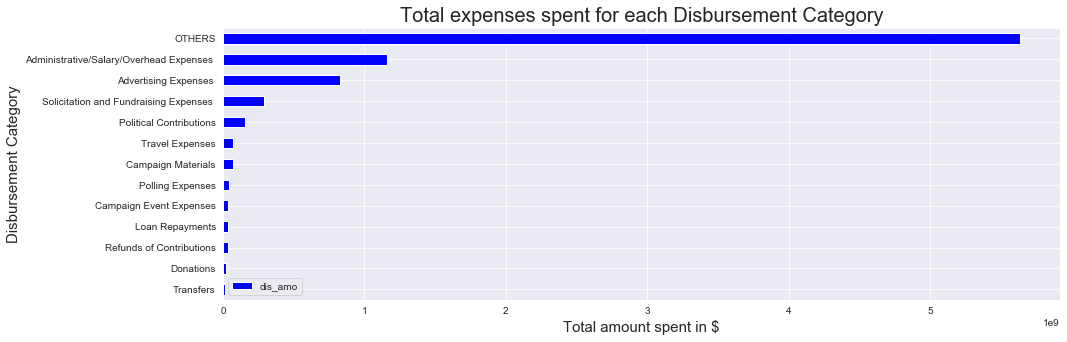

In [22]:

# Aggregating the Total amount by category description level
g = pd.DataFrame(data.groupby(['cat_des']).dis_amo.sum().sort_values())

# Graph plot and graph settings
graph3 = g.plot.barh(figsize=(15,5),color='b')

graph3.set_ylabel('Disbursement Category',size=15)
graph3.set_xlabel('Total amount spent in $',size=15)
graph3.set_title('Total expenses spent for each Disbursement Category',size=20)


## Where the Money is going 

Following the information we recieved from the graph above,we aim to see what companies/Recipients recieve the money to actually see wether it is going into advertising

20% of the total expenses in four years are recieved by the top 30 companies mentioned in the graph.
Most of the top 30 companies are related to Media group or political consultancies.
This graph goes along with our original thought that candidates spend a lot of money on advertising . This goes with our original assumption that candidates spend heavily on advertising their campaigns.This will directly affect the outreach of the candidate.
According to us:More money will be directly proportional to increased outreach.


Text(0, 0.5, 'Total amount spent in $')

Text(0.5, 0, 'Organisations')

Text(0.5, 1.0, 'Total amount recieved by top 30 organisations')

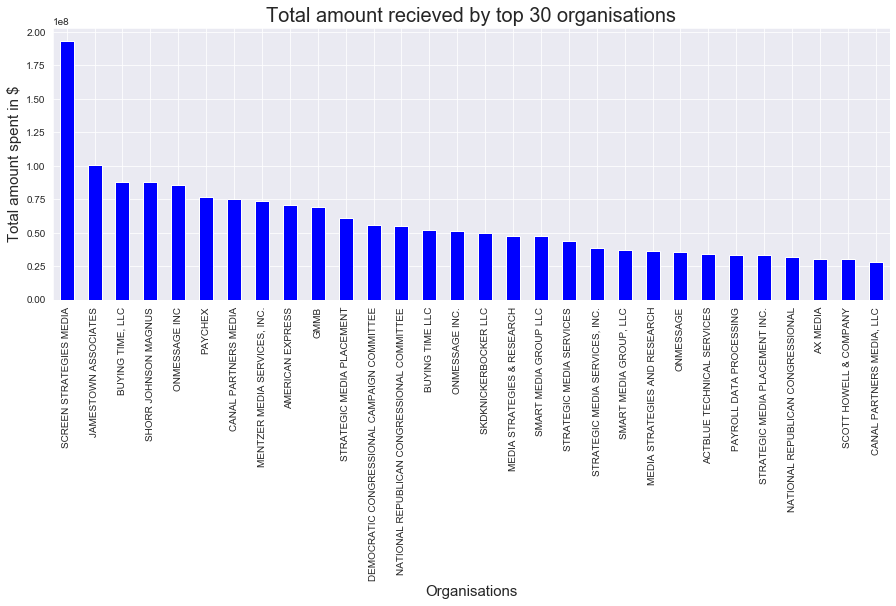

In [27]:
# Applying grup by function and plotting the graph
graph4 = data.groupby(['rec_nam']).dis_amo.sum().sort_values(ascending=False).head(30).plot(kind='bar',figsize=(15,5),color='b')

# Graph settings
graph4.set_ylabel('Total amount spent in $',size=15)
graph4.set_xlabel('Organisations',size=15)
graph4.set_title('Total amount recieved by top 30 organisations',size=20)

# Finding 2:

## Statewise View

Now we move on to a state wise approach.We take the states with the highest expenditure and compare where they spend their money.

Explaination:
Now we take a few states we think are important and analyse them .These are states which recieve some of the highest amounts.
From here we find that The Advertising expenses are highest when compared to other expenses in Virginia. 
In DC, the political contributions is very high percentage when compared to other expenses.We figure this is because The political offices are in DC.
After some study we found that Virginia’s campaign finance laws, some of the loosest in the country, place no restrictions on how much donors can give.This is why candidates can spend the most amount of this donations on advertising.

Again we see that these important states also spend a significant amount in advertising


In [28]:

#calculating average spending statewise in a new data frame
pieces= {'count' : data['can_nam'].groupby(data['can_off_sta']).nunique(),
         'amount': data['dis_amo'].groupby(data['can_off_sta']).sum()}

result = pd.concat(pieces, axis=1)

new=result.reset_index()
new.head()

,can_off_sta,count,amount
0,AK,21,3.754482e+07
1,AL,87,9.702028e+07
2,AR,41,6.459723e+07
3,AS,8,5.110165e+05
4,AZ,171,2.211452e+08


In [36]:
#converting to string
for col in new.columns:
    new[col] = new[col].astype(str)
    
#defining colour scale (We learned this from stackoverflow)


scl = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

#creating text on hover(We learned this from kaggle)
new['text'] = new['can_off_sta'] + '<br>' +\
    'No. of cand.: '+ new['count']
    
#plotting data    
data2 = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = new['can_off_sta'],
        z = new['amount'].astype(float),
        locationmode = 'USA-states',
        text = new['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                
                width = 2
            ) ),
        colorbar = dict(
            title = "Expenditure in USD")
        ) ]

#defining plot properties
layout = dict(
        title = 'US Congressional Elections Average Expenditure by State from 2012 to 2018',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data2, layout=layout )

#plotting boxplot
plotly.offline.iplot(fig)

(0, 600000000)

Text(0, 0.5, 'State')

Text(0.5, 0, 'Total amount spent in $ (stack by Disbursement Category)')

Text(0.5, 1.0, 'Total expenses from 2012 to 2018 by each Disbursement Category')

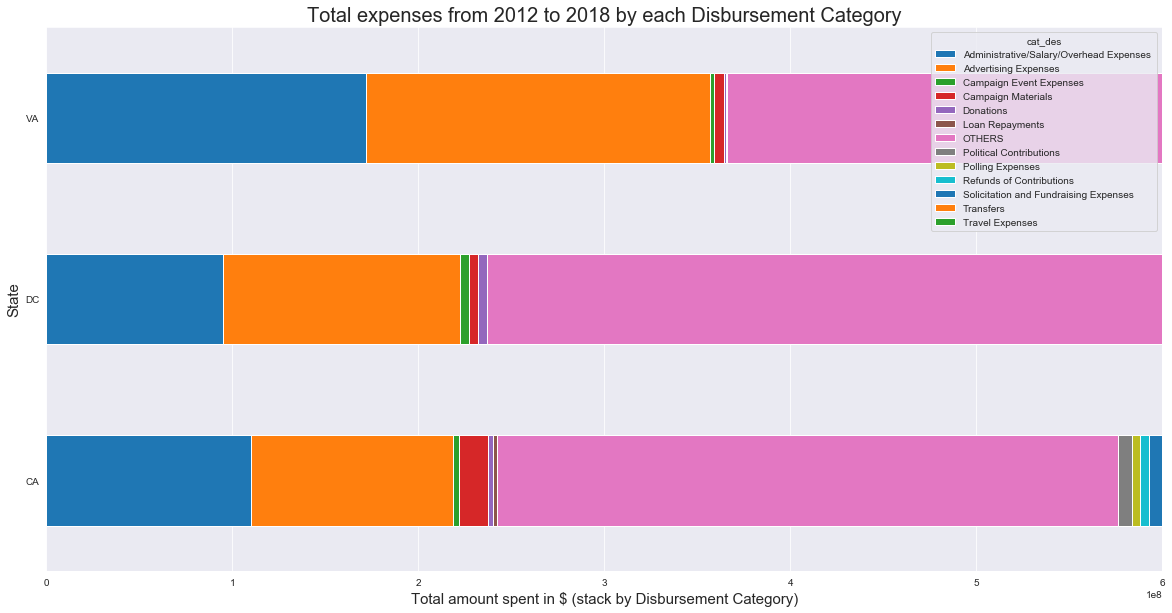

In [38]:
#california :55 electoral votes and highest spending
#DC: office
#Texas :Important swing state for elections

# Aggregated data by state recieved and  category descrption
data_sta_sum = pd.DataFrame(data.groupby(['cat_des','rec_sta'],as_index=False).dis_amo.sum())

# Subsetting the aggregated data for DC, VA and CA
data_DC = data_sta_sum.loc[data_sta_sum['rec_sta'].isin(["DC","VA","CA"])]

# Data is transposed for stack chart
df1 = data_DC.pivot(index='rec_sta', columns='cat_des', values='dis_amo')

# Graph plot and graph settings
graph8 = df1.plot.barh(stacked=True,figsize=(20,10))

graph8.set_xlim(0,600000000)
graph8.set_ylabel('State',size=15)
graph8.set_xlabel('Total amount spent in $ (stack by Disbursement Category)',size=15)
graph8.set_title('Total expenses from 2012 to 2018 by each Disbursement Category',size=20)

# Finding 3 :

## Creating Machine Learning Models

Now we train various models on the dataset to see wether we can predict if the Candidate won an election based on their spending.

In [32]:
## importing dependencies

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


In [33]:
## doing the same cleaning for my dataet used for the model
## please keep in mind when we compared two different datasets,There are a lot of zeros in the win coloumn as a lot of candidate do not end up winning or are not in office anymore.
## We wanted to create some sort of model where we could relate our facts.That is why the most accurate dataset to choose would be 2018 as it is the latest.
df2018.dis_amo.replace({'\$':''},regex=True,inplace=True)
df2018.dis_amo.replace({'\,':''},regex=True,inplace=True)
df2018.dis_amo.replace({'\(':'-'},regex=True,inplace=True)
df2018.dis_amo.replace({'\)':''},regex=True,inplace=True)
df2018.dropna(subset=['dis_dat'], how='all', inplace = True)
df2018['dis_amo'].fillna(data['dis_amo'].mean(), inplace=True)
df2018['can_off_dis'].fillna('UNKNOWN', inplace=True)
df2018['rec_sta'].fillna('UNKNOWN', inplace=True)
df2018['rec_cit'].fillna('UNKNOWN', inplace=True)
df2018['rec_zip'].fillna('UNKNOWN', inplace=True)
df2018['dis_pur_des'].fillna('UNKNOWN', inplace=True)
df2018['cat_des'].fillna('OTHERS', inplace=True)
df2018['rec_nam'].fillna('UNKNOWN', inplace=True)

In [34]:
## creating dataframe for prediction


current_legislator_fec_ids = list(df_legislator_current.fec_ids)
df2018['win'] = df2018.apply(lambda x: (1 if x.can_id in current_legislator_fec_ids else 0),axis=1)
df_p = df2018[['can_id','ele_yea','can_off_dis','cat_des','dis_amo','win']]
df_p

,can_id,ele_yea,can_off_dis,cat_des,dis_amo,win
0,H6AK00045,2018,1,OTHERS,300.00,1
1,H6AK00045,2018,1,OTHERS,3414.98,1
2,H6AK00045,2018,1,OTHERS,2.00,1
3,H6AK00045,2018,1,OTHERS,7000.00,1
4,H6AK00045,2018,1,OTHERS,1394.47,1
...,...,...,...,...,...,...
1063905,S8MO00327,2018,0,Campaign Event Expenses,9.76,0
1063906,S8MO00327,2018,0,Campaign Event Expenses,150.42,0
1063907,S8MO00327,2018,0,Campaign Materials,54.30,0
1063908,S8MO00327,2018,0,Campaign Event Expenses,90.41,0


In [35]:
## converting to categorical values

df_p['can_id'] = df_p['can_id'].astype('category')
df_p['can_id_cat'] = df_p['can_id'].cat.codes

In [36]:
df_p['cat_des'] = df_p['cat_des'].astype('category')
df_p['cat_des_cat'] = df_p['cat_des'].cat.codes

In [37]:
df_p['can_off_dis'] = df_p['can_off_dis'].astype('category')
df_p['can_off_dis_cat'] = df_p['can_off_dis'].cat.codes

In [38]:
## splitting into train and test sets

dataset=df_p
x=df_p.iloc[:,[1,4,6,7,8]].values
y=df_p.iloc[:,5].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1. Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of 
linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.

In [40]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

68.93

2. KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in
which the data points are separated into several classes to predict the classification of a new sample point. 

In [41]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

99.24

array([[105391,  37627],
       [ 42078,  80854]], dtype=int64)

Text(0.5, 25.0, 'y_pred')

Text(25.0, 0.5, 'y_true')

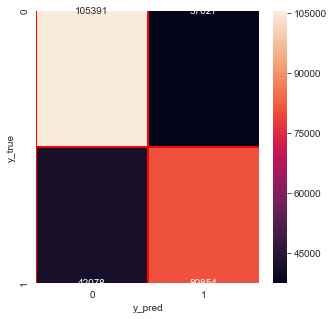

In [53]:
#Confusion matrix with knn parameters and predictions.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


3. Gaussian Naive Bayes is an algorithm having a Probabilistic Approach. It involves prior 
and posterior probability calculation of the classes in the dataset and the test data given a class respectively.

In [42]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


GaussianNB(priors=None, var_smoothing=1e-09)

70.19

4. Logistic regression is a statistical model that in its basic form uses a
logistic function to model a binary dependent variable, although many more complex extensions exist.

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

69.95

In [44]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
               'Naive Bayes',
               'SGDClassifier' 
              ],
    'Score': [acc_knn, acc_log, 
             acc_gaussian,
              acc_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,99.24
2,Naive Bayes,70.19
1,Logistic Regression,69.95
3,SGDClassifier,68.93


For our model, KNN turned out to be the most accurate.


## <center> THANK YOU <CENTER>

REFERENCES:
    www.kaggle.com
    www.data.gov.com
    www.stackoverflow.com

    
ACKNOWLEDGEMENTS:
    We would like to thank Professor Denis for guiding us 
    through this course and helping us learn Data Analytics with Python